In [1]:
import numpy as np
import pandas as pd
import os
import json
from datetime import datetime, timedelta

In [2]:
prolific_df = pd.read_csv('SL data/prolific_export_62a84abe9481aff7d834e7f7.csv', index_col='participant_id')
sl_experience_df = pd.read_csv('SL data/SL Experience survey.csv', index_col='Enter PROLIFIC ID:')

In [3]:
prolific_df.head()

,session_id,status,started_datetime,completed_date_time,time_taken,age,num_approvals,num_rejections,prolific_score,reviewed_at_datetime,entered_code,Country of Birth,Current Country of Residence,Employment Status,First Language,Nationality,Record Video,Sex,Student Status,Webcam
participant_id,,,,,,,,,,,,,,,,,,,,
5ec81ba6c71d2b0f9add5de5,62a9d823491530d998840581,RETURNED,2022-06-15 13:01:23.669000,NaN,66287.235094,21.0,138,3,98,NaN,NaN,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED
60d85bfa9227dcaa553083c7,62a9d829379fa5c2bb8ca5f3,RETURNED,2022-06-15 13:01:29.498000,NaN,66281.419391,20.0,59,0,100,NaN,NaN,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED
60c6315f59f271322758e94a,62a9d835446220cb061c1d64,REJECTED,2022-06-15 13:01:41.867000,2022-06-15 13:07:12.441000,330.574000,22.0,41,2,97,2022-06-15 13:37:30.380000,NOCODE,South Africa,South Africa,DATA EXPIRED,DATA EXPIRED,South Africa,Yes,Female,DATA EXPIRED,Yes
613b7b74f40bbe72dee491b5,62a9d835554d73e03eebff23,AWAITING REVIEW,2022-06-15 13:01:44.844000,2022-06-15 13:08:52.195000,427.351000,23.0,57,1,100,NaN,39F54BF2,Mexico,Mexico,Unemployed (and job seeking),Spanish,Mexico,Yes,Female,Yes,Yes
6108033c1bf591fee2013a07,62a9d843915a5663c246dc08,RETURNED,2022-06-15 13:01:55.780000,NaN,66255.188533,27.0,103,0,100,NaN,NaN,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED


In [137]:
sl_experience_df.head()

,Timestamp,Full Name:,Age:,Gender:,Highest Level of Education:,Which city / country am I from?,Do I have any knowledge of Sign Language (E.g.: American Sign Language)?,"If you selected ""Yes"" in the previous question, which sign language do you know?","I used the ""TRY IT OUT"" section to get aware of the application.",I felt comfortable using this system.,...,"The ""TRY IT OUT"" section was quite helpful to know the application before starting.",It was easy to find the information I needed.,The information was effective in helping me complete the task.,The time allotted (15 seconds) to finish each sub-task was enough.,The organization of information on the system screens was clear.,I would prefer to use Sign Language over typing for such tasks,The interface of this system was pleasant.,The system was able to correctly interpret the signs I made for the sub-tasks.,"Overall, I am satisfied with this system and could use Sign Language to complete any future tasks.",Do you have any other suggestions / recommendations / problems faced related to the entire task?
Enter PROLIFIC ID:,,,,,,,,,,,,,,,,,,,,,
60e343946a7faddde88fbe3c,2022/06/10 3:58:46 PM GMT+2,Rolivhuwa Lidzhade,28,Male,Bachelor’s degree,South Africa,Yes,NaN,1,5,...,1,5,5,5,5,5,4,4,5,NaN
6053ce04a276ce713b3e7c1a,2022/06/10 4:41:13 PM GMT+2,6053ce04a276ce713b3e7c1a,28,Female,Master’s degree,"Ottawa, Canada",No,NaN,1,4,...,1,5,5,4,5,2,4,4,4,There was sometimes a delay between the pictur...
613b7b74f40bbe72dee491b5,2022/06/15 3:08:45 PM GMT+2,Sofía Fuentes,23,Female,Bachelor’s degree,Mexico city,No,NaN,2,3,...,3,3,4,5,4,3,3,3,5,NaN
615e91bde2fa93822a4b6179,2022/06/15 3:11:59 PM GMT+2,andani,23,Male,Bachelor’s degree,south africa,No,NaN,5,3,...,1,1,1,1,5,1,5,1,1,NaN
61140416ad1f6526c22b2b4c,2022/06/15 3:12:26 PM GMT+2,Pedro Pires,20,Male,Bachelor’s degree,Portugal,No,NaN,1,3,...,3,3,4,4,4,1,2,2,1,NaN


In [149]:
temp = sl_experience_df.loc[sl_experience_df['Do I have any knowledge of Sign Language (E.g.: American Sign Language)?'] != 'Yes']
temp['The "TRY IT OUT" section was quite helpful to know the application before starting.'].mean()

3.4444444444444446

In [5]:
res = []
resdir = os.listdir('SL data/res/')
for file in resdir:
    res.append(file.split('_')[0])


In [23]:
count = 0

for index, row in prolific_df.iterrows():
    if row['status'] != 'AWAITING REVIEW':
        count += 1
        print(index)
        if index in sl_experience_df.index:
            sl_experience_df.drop(index, inplace=True)
            print("Dropped from SL_Experience", index)
        if index in res: # and os.path.exists(os.path.join('res',index+'_'+row['session_id']+'.txt')):
            os.remove(os.path.join('res', index+'_'+row['session_id']+'.txt'))
            print("Result file removed", index)
        

5ec81ba6c71d2b0f9add5de5
60d85bfa9227dcaa553083c7
60c6315f59f271322758e94a
6108033c1bf591fee2013a07
61164af5d35616bf4e9f3255
60f95234964c8e7bc43243c3
5f11e0eb0e49cf0d036cdeb5
6107f99b4033d300a0879ed9
5d78d8ee90a13d001602b49c
611ce3570a53282a7597ee62
600c076036051a2e189d19f2
60c0df44f76460e8d205929f
60ec646b222d9ccbb92cef6b
6172e800b8d0e8883d85473d
5ee93a8aa43b042d2529faec
5ea958440d24f004332319bc
Result file removed 5ea958440d24f004332319bc
613625b3e47f5f6e037a1848
Result file removed 613625b3e47f5f6e037a1848
600fdb12201b201d40206411
60ddf37bac75d61cfa6e81fc
5f34331ef23dad166139d50b
6164b4422e2259bfaa67f33a
6075848404073601c3294741
615ace5aa72cd06120cce82f
5b9259ab94d1b90001a1ec36
616d631dbb3ae2e1503d8c11
5ea94cd32998a7034eaabdf5
6074b3ec8435c912224ed2d1
5f024691e3eda51001d5e1ae
61531814ac42ccab4dae7be1
602157bde0dc220d5172cb4a
60ca883c03ff81263967f06a
5fac1a3e935a7d133be5a4d7
5ffca360e5368712c0d99025
61732ac97ff5ebe39ca321e5
60bfab23ea351ed10c772908
61068e53a1ecfcf4d50b9219
60f6c87c7e

In [6]:
print(len(sl_experience_df), len(prolific_df), len(res))

93 361 81


In [13]:
count=0
for index, row in sl_experience_df.iterrows():
    print(index)
    count+=1
    if index not in res:
        print("##############3", index)
print(count)

60e343946a7faddde88fbe3c
6053ce04a276ce713b3e7c1a
613b7b74f40bbe72dee491b5
615e91bde2fa93822a4b6179
61140416ad1f6526c22b2b4c
61516f157092b66018472a2f
6144508baad90adc1c7cdeb1
5c8942ff42ff490015c7e32e
60dfc9563e2dcbbf37767b14
5eb181ce611ac50989d4bd03
##############3 5eb181ce611ac50989d4bd03
6169a6082f7211a8678ad266
61143239ca74fd7541bd8399
5ba400e988f5f40001c90843
608d4e91d08ff4d32dbba3ad
61272112a45a9698f73a2070
5f209bb12cf3543aed1fee25
615e80f8f7b842e4f5653268
612dd1efd339db83def47366
601dce7bf47e0a1c616c05cc
5f27d05bbf1239014776fc3a
61522bba58abdb7bdf423099
61153a21a5d0c2e4d488e131
5f857edcc4d42502bec40821
6161b68070e752f148566630
600de197658fd23cca8b3bf1
5ea958440d24f004332319bc
##############3 5ea958440d24f004332319bc
611ce3140be0fc75d7cf2c67
611a88816a0701c43ae30df6
5c18af2fa3ee6c00019c52b4
6026944b7f3b5d347dd3c6f7
##############3 6026944b7f3b5d347dd3c6f7
60ec3a9f215cdd6282ebae6c
##############3 60ec3a9f215cdd6282ebae6c
5c813f9e40650900116d13aa
60d31faf73bf3313b441aebf
616736ea3a3

In [68]:
resdir = os.listdir('SL data/res/')
emptyres = 0

for file in resdir:
    
    with open(os.path.join('SL data', 'res', file)) as f:
        s = f.read()
        s = s.replace('{\'','{\"')
        s = s.replace('\': \'','\": \"')
        s = s.replace('\', \'','\", \"')
        s = s.replace('\': [','\": [')
        s = s.replace('\' \'','\" \"')
        s = s.replace('[\'','[\"')
        s = s.replace('\']','\"]')
        s = s.replace('], \'','], \"')
        s = s.replace('\'}','\"}')
        s = s.replace('\':','\":')
        s = s.replace(', \'',', \"')
        try:
            json_data = json.loads(s)
        except:
            print(s)
        count = 0
        for t in json_data['tasks']:
            if len(t['response']) == 0:
                count += 1
        if count == 16:
            print(file)
            emptyres += 1
    #break
print(emptyres)

5f857edcc4d42502bec40821_62a9da57bd340dd2f83dd73f.txt
60e343946a7faddde88fbe3c_62a9deb33c31107c5745a8cc.txt
5f16ea9ebc1b4201e1f0b47e_62a9f019a4598d0d4a256fc4.txt
60cb4f111e27b7ab3656e188_62a9edd69eb14ee4eb53b435.txt
5f90c32f69122f1cebd1cc0b_62a9dcb517c7edc54b8405e1.txt
6144508baad90adc1c7cdeb1_62a9d917335c1b02ea153733.txt
613b7b74f40bbe72dee491b5_62a9d835554d73e03eebff23.txt
60e343946a7faddde88fbe3c_62a34887a77e171837579005.txt
615e80f8f7b842e4f5653268_62a9d96c5e5b96bcbb819b5c.txt
5c18af2fa3ee6c00019c52b4_62a9d9b80e93c81bd7c7ddca.txt
612dd1efd339db83def47366_62a9d9ec5885568a72d419bc.txt
61153a21a5d0c2e4d488e131_62a9da19415b581c582fbed9.txt
61272112a45a9698f73a2070_62a9d9d49679ab36a7af7967.txt
61645fccc9e03464d67350e7_62a9dd246d50c911c43eb12f.txt
616093ab4117242c856402c6_62a9e24736168a71ac8cafb0.txt
60d63e407fce934334a5e025_62a9ea81340edcf3a7e67681.txt
61608788d43bd11eaf30394a_62a9deb563f37d5fc9968b49.txt
6160d556747bbac73b681dc0_62a9f470203ce45d22090224.txt
6161b68070e752f148566630_62a

In [7]:
import pingouin as pg

In [8]:
copy_sl_experience_df = pd.read_csv('SL data/SL Experience survey.csv')

In [56]:
copy_sl_experience_df.head()

,"I used the ""TRY IT OUT"" section to get aware of the application.",I felt comfortable using this system.,I was able to complete the tasks and scenarios quickly using this system.,There was enough time to complete the task.,Overall I am satisfied with how easy it is to use this system.,"The information (such as on-screen messages, task descriptions, and other links) provided with this system was clear.","The ""TRY IT OUT"" section was quite helpful to know the application before starting.",It was easy to find the information I needed.,The information was effective in helping me complete the task.,The time allotted (15 seconds) to finish each sub-task was enough.,The organization of information on the system screens was clear.,I would prefer to use Sign Language over typing for such tasks,The interface of this system was pleasant.,The system was able to correctly interpret the signs I made for the sub-tasks.,"Overall, I am satisfied with this system and could use Sign Language to complete any future tasks."
0,1,5,4,5,5,5,1,5,5,5,5,5,4,4,5
1,1,4,4,5,4,5,1,5,5,4,5,2,4,4,4
2,2,3,4,4,4,3,3,3,4,5,4,3,3,3,5
3,5,3,1,1,5,3,1,1,1,1,5,1,5,1,1
4,1,3,3,4,2,3,3,3,4,4,4,1,2,2,1


In [136]:
copy_sl_experience_df['I would prefer to use Sign Language over typing for such tasks'].mean()

2.5698924731182795

In [76]:
sl_time_completion = [
    'I was able to complete the tasks and scenarios quickly using this system.',
    'There was enough time to complete the task.',
    'The time allotted (15 seconds) to finish each sub-task was enough.'
]
sl_interface_satisfaction = [
    'I felt comfortable using this system.',
    'Overall I am satisfied with how easy it is to use this system.',
    'It was easy to find the information I needed.',
    'The information was effective in helping me complete the task.',
    'The organization of information on the system screens was clear.',
    'The interface of this system was pleasant.'
]
sl_task_preference = [
    'I would prefer to use Sign Language over typing for such tasks',
    'The system was able to correctly interpret the signs I made for the sub-tasks.',
    'Overall, I am satisfied with this system and could use Sign Language to complete any future tasks.'
]

In [94]:
sl_time_rating_sum = []
for t in sl_time_completion:
    sl_time_rating_sum.append(copy_sl_experience_df[t].tolist())
    
sl_time_rating_sum = list(np.concatenate(sl_time_rating_sum).flat)
print('Time completion average rating:',np.average(sl_time_rating_sum))

Time completion average rating: 3.2974910394265233


In [95]:
sl_interface_rating_sum = []
for t in sl_interface_satisfaction:
    sl_interface_rating_sum.append(copy_sl_experience_df[t].tolist())
    
sl_interface_rating_sum = list(np.concatenate(sl_interface_rating_sum).flat)
print('Interface Satisfaction average rating:',np.average(sl_interface_rating_sum))

Interface Satisfaction average rating: 3.263440860215054


In [96]:
sl_preference_rating_sum = []
for t in sl_task_preference:
    sl_preference_rating_sum.append(copy_sl_experience_df[t].tolist())
    
sl_preference_rating_sum = list(np.concatenate(sl_preference_rating_sum).flat)
print('Task Preference average rating:',np.average(sl_preference_rating_sum))

Task Preference average rating: 2.727598566308244


In [10]:
# Cronbach's Alpha score for SL experience form
del copy_sl_experience_df['Timestamp']
del copy_sl_experience_df['Enter PROLIFIC ID:']
del copy_sl_experience_df['Full Name:']
del copy_sl_experience_df['Age:']
del copy_sl_experience_df['Gender:']
del copy_sl_experience_df['Highest Level of Education:']
del copy_sl_experience_df['Which city / country am I from?']
del copy_sl_experience_df['Do I have any knowledge of Sign Language (E.g.: American Sign Language)?']
del copy_sl_experience_df['If you selected "Yes" in the previous question, which sign language do you know?']
del copy_sl_experience_df['Do you have any other suggestions / recommendations / problems faced related to the entire task?']

pg.cronbach_alpha(data=copy_sl_experience_df)

(0.8965680480702652, array([0.863, 0.925]))

In [11]:
sl_experience_df['Gender:'].value_counts()

Female    47
Male      46
Name: Gender:, dtype: int64

In [12]:
agecount=0
ages = []
count=0
for index,row in sl_experience_df.iterrows():
    if index in res:
        ages.append(row['Age:'])
        count+=1
        agecount += row['Age:']
print(agecount, count)

2365 80


In [13]:
def taskStats(resdir, path, inputt='sl'):
    results = []
    tweet_label = ['negative', 'neutral', 'positive']

    for file in resdir:
        with open(os.path.join(path, 'res', file)) as f:
            
            s = f.read()
            s = s.replace('{\'','{\"')
            s = s.replace('\': \'','\": \"')
            s = s.replace('\', \'','\", \"')
            s = s.replace('\': [','\": [')
            s = s.replace('\' \'','\" \"')
            s = s.replace('[\'','[\"')
            s = s.replace('\']','\"]')
            s = s.replace('], \'','], \"')
            s = s.replace('\'}','\"}')
            s = s.replace('\':','\":')
            s = s.replace(', \'',', \"')
            
            json_data = json.loads(s)
            diff = datetime.strptime(json_data['end_date'], '%Y-%m-%d %H:%M:%S') - datetime.strptime(json_data['start_date'], '%Y-%m-%d %H:%M:%S')
            json_data['time_diff'] = str(diff)
            json_data['time_diff_seconds'] = diff.seconds

            task_count = 0
            accuracy = 0
            vqa_count = 0
            tsa_count = 0
            accurate_vqa = 0
            accurate_tsa = 0
            
            for t in json_data['tasks']:
                try:
                    if len(t['response']) != 0:
                        task_count += 1
                        
                        if inputt == 'sl':
                            t['response'] = [x.lower() for x in t['response']]
                        else:
                            t['response'] = t['response'].lower()
                            
                        if len(t['image_name']) == 0 and len(t['tweet']) == 0:
                            continue
                        elif len(t['image_name']) != 0 and len(t['tweet']) == 0:
                            vqa_count += 1
                        elif len(t['image_name']) == 0 and len(t['tweet']) != 0:
                            tsa_count += 1
                                                
                        if len(t['tweet']) == 0 and (t['label'] in t['response'] 
                                                     or t['label'] == t['response']):
                            accurate_vqa += 1
                            accuracy += 1
                        elif len(t['tweet']) != 0 and (tweet_label[t['label']] in t['response'] 
                                                       or tweet_label[t['label']] == t['response']):
                            accurate_tsa += 1
                            accuracy += 1
                except:
                    continue
                    
            json_data['accurate_vqa'] = accurate_vqa
            json_data['accurate_tsa'] = accurate_tsa
            json_data['vqa_count'] = vqa_count
            json_data['tsa_count'] = tsa_count
            json_data['task_completed'] = task_count
            json_data['accurate_tasks'] = accuracy
            results.append(json_data)
            # print(json_data)
            # break
            
    return results

In [14]:
sl_total_task_count = 0
sl_total_accurate_tasks = 0
sl_total_time = 0
sl_total_vqa = 0
sl_total_accurate_vqa = 0
sl_total_tsa = 0
sl_total_accurate_tsa = 0
sl_time_collection = []
sl_accuracy_collection = []

sl_results = taskStats(os.listdir('SL data/res/'), 'SL data')
for x in sl_results:
    
    sl_time_collection.append(x['time_diff_seconds'])
    if x['task_completed'] != 0:
        sl_accuracy_collection.append(x['accurate_tasks']*100/x['task_completed'])
    #else:
    #    sl_accuracy_collection.append(0.0)
    
    sl_total_vqa += x['vqa_count']
    sl_total_accurate_vqa += x['accurate_vqa']
    sl_total_tsa += x['tsa_count']
    sl_total_accurate_tsa += x['accurate_tsa']
    sl_total_task_count += x['task_completed']
    sl_total_accurate_tasks += x['accurate_tasks']
    sl_total_time += x['time_diff_seconds']
    
print(sl_total_accurate_tasks)
print(sl_total_task_count)
print(sl_total_time)

print("SL VQA task Accuracy:", sl_total_accurate_vqa*100/sl_total_vqa)
print("SL TSA task Accuracy:", sl_total_accurate_tsa*100/sl_total_tsa)

print("SL task Accuracy:", sl_total_accurate_tasks*100/sl_total_task_count)
print("SL task average time:", str(timedelta(seconds=sl_total_time/len(sl_results))))
print("SL task average time in seconds:", str(timedelta(seconds=sl_total_time/len(sl_results)).seconds))

174
512
20122
SL VQA task Accuracy: 44.93927125506073
SL TSA task Accuracy: 23.77358490566038
SL task Accuracy: 33.984375
SL task average time: 0:04:08.419753
SL task average time in seconds: 248


In [15]:
sl_results

[{'start_date': '2022-6-15 14:35:53',
  'prolific_pid': '61504fea6e84e5a81f36b68c',
  'session_id': '62a9dec23b25f0811fcd5c5c',
  'tasks': [{'image_name': '',
    'question': '',
    'tweet': '%40user%20%40user%20but%20also%20Michael%20Moore.%20Weird%20mix.',
    'label': 0,
    'response': []},
   {'image_name': 'static/val2014_yesno_refined/COCO_val2014_000000331250.jpg',
    'question': 'Are these children all the same age?',
    'tweet': '',
    'label': 'yes',
    'response': []},
   {'image_name': '',
    'question': '',
    'tweet': 'New%20Look%20At%20Luke%20Evans%20and%20Emma%20Watson%20As%20Gaston%20and%20Belle%20In%20%23BeautyAndTheBeast',
    'label': 1,
    'response': []},
   {'image_name': 'static/val2014_yesno_refined/COCO_val2014_000000244833.jpg',
    'question': 'Is this a movie theater for bikers?',
    'tweet': '',
    'label': 'yes',
    'response': []},
   {'image_name': '',
    'question': '',
    'tweet': 'UN%20Eliminating%20Violence%20Against%20Women%20World%20

# Text input 

In [16]:
text_prolific_df = pd.read_csv('Text_Data/prolific_export_62a84b8337850454bed66c81.csv', index_col='participant_id')
text_experience_df = pd.read_csv('Text_Data/Task Experience survey.csv', index_col='Enter PROLIFIC ID:')

In [17]:
len(text_prolific_df)

98

In [18]:
text_prolific_df.head()

,session_id,status,started_datetime,completed_date_time,time_taken,age,num_approvals,num_rejections,prolific_score,reviewed_at_datetime,entered_code,Country of Birth,Current Country of Residence,Employment Status,First Language,Nationality,Sex,Student Status
participant_id,,,,,,,,,,,,,,,,,,
61006e8a4fe954de47730409,62ab1e91328c05d8e179aa91,AWAITING REVIEW,2022-06-16 12:14:09.752000,2022-06-16 12:34:20.657000,1210.905,23.0,94,0,100,NaN,78AD9052,Greece,Greece,"Not in paid work (e.g. homemaker', 'retired or...",Greek,Greece,Female,Yes
610287af335961f22b04ab82,62ab1e97be07bceac1243383,AWAITING REVIEW,2022-06-16 12:14:15.459000,2022-06-16 12:23:39.069000,563.610,24.0,41,2,98,NaN,78AD9052,Malawi,South Africa,Other,DATA EXPIRED,Malawi,Female,Yes
61751ada89a2195bb28b15ab,62ab1e9bc4c3041e7a8f1390,REJECTED,2022-06-16 12:14:40.580000,2022-06-16 12:37:43.454000,1382.874,25.0,6,1,96,2022-06-16 12:39:40.782000,https://www.google.com/url?q=https://app.proli...,South Africa,South Africa,Full-Time,Afrikaans,South Africa,Female,Yes
60f1c68167abfb955f8a764f,62ab1e9e2745017796bd3b46,AWAITING REVIEW,2022-06-16 12:14:36.894000,2022-06-16 12:26:34.621000,717.727,19.0,21,0,100,NaN,78AD9052,South Africa,South Africa,Unemployed (and job seeking),DATA EXPIRED,South Africa,Female,Yes
5e90ac47f9c9d13bd8831182,62ab1eabab0f10cb84319f59,AWAITING REVIEW,2022-06-16 12:14:35.877000,2022-06-16 12:20:09.733000,333.856,21.0,115,1,100,NaN,78AD9052,Poland,Poland,Unemployed (and job seeking),Polish,Poland,Male,Yes


In [19]:
len(text_experience_df)

70

In [20]:
text_experience_df.head()

,Timestamp,Full Name:,Age:,Gender:,Highest Level of Education:,Which city / country am I from?,How did I provide input for the sub-tasks?,I felt comfortable using this system.,I was able to complete the tasks and scenarios quickly using this system.,There was enough time to complete the task.,Overall I am satisfied with how easy it is to use this system.,"The information (such as on-screen messages, task descriptions, and other links) provided with this system was clear.",It was easy to find the information I needed.,The information was effective in helping me complete the task.,The organization of information on the system screens was clear.,I would prefer to type for such tasks,The interface of this system was pleasant.,I would prefer to click buttons for such tasks,"Overall, I am satisfied with this system.",Do you have any other suggestions / recommendations / problems faced related to the entire task?
Enter PROLIFIC ID:,,,,,,,,,,,,,,,,,,,,
5f158dc6bbb7d36487982427,2022/06/10 3:22:04 PM GMT+2,Paulina Kotwica,26,Female,Bachelor’s degree,"Wrocław, Poland",Button Click,4,5,5,5,5,5,5,5,2,5,3,5,NaN
611d2e6635cf885144a615f3,2022/06/10 3:40:07 PM GMT+2,Andisiwe Maxela,33,Female,Bachelor’s degree,East Londn,Typing Text,4,4,5,5,4,5,4,5,2,4,5,5,no
604f52495c65b08a23602650,2022/06/16 2:19:36 PM GMT+2,Cecilia Bianchi,21,Female,High School Graduate,Rome,Typing Text,4,3,4,3,3,4,4,4,2,2,4,3,NaN
5e90ac47f9c9d13bd8831182,2022/06/16 2:19:56 PM GMT+2,Remigiusz,21,Male,Bachelor’s degree,Bydgoszcz Poland,Typing Text,4,5,5,5,5,5,5,5,3,5,3,5,Some Images didint work at all but rest of the...
5ec2e068e4720610dbb7cc7f,2022/06/16 2:20:00 PM GMT+2,Fabio Oliveira,23,Male,Master’s degree,"Portugal, Braga",Typing Text,5,4,5,5,3,4,5,3,3,5,5,5,NaN


In [21]:
text_res = []
resdir = os.listdir('Text_Data/res/')
for file in resdir:
    text_res.append(file.split('_')[0])


In [22]:
len(text_res)

82

In [23]:
text_res

['6136a1e1159dc808ad660d89',
 '',
 '611d14372f0789675dc47b76',
 '6033759743d65740e101c8df',
 '5d9fa9371da3ac0011d56df4',
 '5e209e63f814783b253a93ed',
 '5f158dc6bbb7d36487982427',
 '613c96251354a2ab1529c6f6',
 '61238fb9d937f53ca982d487',
 '616c3cbc9f45e7120b08bad6',
 '5e2c240986f3a3249ea3231c',
 '5f9c306fcdb29d0852eb995f',
 '5fd131a9a38b070be1ad92f0',
 '610587464f9bcaa32f906e67',
 '614f43e9d36cd32f08791690',
 '61006e8a4fe954de47730409',
 '5fd85707af5bd719a5e20419',
 '6116781cac43a08b7f0cdfa2',
 '5ef756bd60ee3e03dea31025',
 '5d7374ab99bf5b0018864719',
 '61086c2bfda98ba5d75b9db4',
 '60fc26024ee3d22b731bbf33',
 '60a7cb29eb3c95ba62abbe28',
 '5e82142eca18009316c6b138',
 '5f0c995fb3b906653518cc76',
 '6155d5e191a8a0b9fc7f1371',
 '608975d87f37383a397e76ce',
 '5e90ac47f9c9d13bd8831182',
 '61184395bd2b2c2ff52cb611',
 '61349de7a00deb717f2ee962',
 '5fc9336404f01439deeefc9c',
 '61486bde7feea52c1bc87359',
 '60733d6690d0d13013e9f40a',
 '60df86f27412c09bf1ac1ff8',
 '5ece738d76cf9722c9c738e2',
 '606f1cd

In [24]:
count = 0
for index, row in text_prolific_df.iterrows():
    if row['status'] != 'AWAITING REVIEW':
        count += 1
        print(index)
        if index in text_experience_df.index:
            text_experience_df.drop(index, inplace=True)
            print("Dropped from text_Experience", index)
        if index in text_res: # and os.path.exists(os.path.join('res',index+'_'+row['session_id']+'.txt')):
            os.remove(os.path.join('Text_Data', 'res', index+'_'+row['session_id']+'.txt'))
            print("Result file removed", index)
        

61751ada89a2195bb28b15ab
Result file removed 61751ada89a2195bb28b15ab
5e8b811dcdbb58057efa41cd
5e75250226bc7f09313f257a
5f9eea7b0517c64cdfdd4f8a
615381bb306f60893c20fddc
Result file removed 615381bb306f60893c20fddc
602d072524ce4c64a9ac1be3
Result file removed 602d072524ce4c64a9ac1be3
615ca3489232488d7a6ef8a3
Result file removed 615ca3489232488d7a6ef8a3
617668ba30fe0e01aea3f928
Result file removed 617668ba30fe0e01aea3f928
60f2be10f84eb35558463468
61524bbc25d763f05d100f98
Result file removed 61524bbc25d763f05d100f98
5c1d19c810677f0001d9d56c
Dropped from text_Experience 5c1d19c810677f0001d9d56c
Result file removed 5c1d19c810677f0001d9d56c
608ac7c46763883ddaa7cc50
Result file removed 608ac7c46763883ddaa7cc50
612a8b3510b00a1e033924e6
Result file removed 612a8b3510b00a1e033924e6
60df29c8447c436619e127fe
Result file removed 60df29c8447c436619e127fe
60f8627e9ba35095464501b9
Result file removed 60f8627e9ba35095464501b9
5f4e76eff69af505fa21da55
61278561abb03057313a44fc
5e330a633d12d4000ac54985


In [24]:
copy_text_experience_df = pd.read_csv('Text_Data/Task Experience survey.csv')

In [92]:
copy_text_experience_df.head()

,I felt comfortable using this system.,I was able to complete the tasks and scenarios quickly using this system.,There was enough time to complete the task.,Overall I am satisfied with how easy it is to use this system.,"The information (such as on-screen messages, task descriptions, and other links) provided with this system was clear.",It was easy to find the information I needed.,The information was effective in helping me complete the task.,The organization of information on the system screens was clear.,I would prefer to type for such tasks,The interface of this system was pleasant.,I would prefer to click buttons for such tasks,"Overall, I am satisfied with this system."
0,4,5,5,5,5,5,5,5,2,5,3,5
1,4,4,5,5,4,5,4,5,2,4,5,5
2,4,3,4,3,3,4,4,4,2,2,4,3
3,4,5,5,5,5,5,5,5,3,5,3,5
4,5,4,5,5,3,4,5,3,3,5,5,5


In [134]:
print(copy_text_experience_df['I would prefer to click buttons for such tasks'].mean(), 
      copy_text_experience_df['I would prefer to type for such tasks'].mean())

4.271428571428571 2.585714285714286


In [93]:
text_time_completion = [
    'I was able to complete the tasks and scenarios quickly using this system.',
    'There was enough time to complete the task.'
]
text_interface_satisfaction = [
    'I felt comfortable using this system.',
    'Overall I am satisfied with how easy it is to use this system.',
    'The information (such as on-screen messages, task descriptions, and other links) provided with this system was clear.',
    'It was easy to find the information I needed.',    
    'The information was effective in helping me complete the task.',
    'The organization of information on the system screens was clear.',
    'The interface of this system was pleasant.'
]
text_task_preference = [
    'I would prefer to type for such tasks',
    'I would prefer to click buttons for such tasks',
    'Overall, I am satisfied with this system.'
]

In [100]:
text_time_rating_sum = []
for t in text_time_completion:
    text_time_rating_sum.append(copy_text_experience_df[t].tolist())
    
text_time_rating_sum = list(np.concatenate(text_time_rating_sum).flat)
print('Time completion average rating:',np.average(text_time_rating_sum))

Time completion average rating: 4.271428571428571


In [109]:
text_interface_rating_sum = []
for t in text_interface_satisfaction:
    text_interface_rating_sum.append(copy_text_experience_df[t].tolist())
    
text_interface_rating_sum = list(np.concatenate(text_interface_rating_sum).flat)
print('Interface Satisfaction average rating:',np.average(text_interface_rating_sum))

Interface Satisfaction average rating: 3.9591836734693877


In [110]:
text_preference_rating_sum = []
for t in text_task_preference:
    text_preference_rating_sum.append(copy_text_experience_df[t].tolist())
    
text_preference_rating_sum = list(np.concatenate(text_preference_rating_sum).flat)
print('Task Preference average rating:',np.average(text_preference_rating_sum))

Task Preference average rating: 3.6095238095238096


In [26]:
del copy_text_experience_df['Timestamp']
del copy_text_experience_df['Enter PROLIFIC ID:']
del copy_text_experience_df['Full Name:']
del copy_text_experience_df['Age: ']
del copy_text_experience_df['Gender:']
del copy_text_experience_df['Highest Level of Education:']
del copy_text_experience_df['Which city / country am I from?']
del copy_text_experience_df['How did I provide input for the sub-tasks?']
del copy_text_experience_df['Do you have any other suggestions / recommendations / problems faced related to the entire task?']

# Cronbach's Alpha for text input experience form.
pg.cronbach_alpha(data=copy_text_experience_df)

(0.9077205474439056, array([0.872, 0.937]))

In [27]:
text_experience_df['Gender:'].value_counts()

Female        41
Male          27
non binary     1
Non-Binary     1
Name: Gender:, dtype: int64

In [28]:
agecount=0
count=0
for index,row in text_experience_df.iterrows():
    if index in text_res:
        count+=1
        agecount += row['Age: ']
        ages.append(row['Age: '])
print(agecount, count)

1841 68


In [29]:
text_total_task_count = 0
text_total_accurate_tasks = 0
text_total_time = 0
text_total_vqa = 0
text_total_accurate_vqa = 0
text_total_tsa = 0 
text_total_accurate_tsa = 0
text_time_collection=[]
text_accuracy_collection = []

text_results = taskStats(os.listdir('Text_Data/res/'), 'Text_Data','text')
for x in text_results:
    
    text_time_collection.append(x['time_diff_seconds'])
    if x['task_completed'] != 0:
        text_accuracy_collection.append(x['accurate_tasks']*100/x['task_completed'])
    #else:
    #    text_accuracy_collection.append(0.0)
    
    text_total_vqa += x['vqa_count']
    text_total_accurate_vqa += x['accurate_vqa']
    text_total_tsa += x['tsa_count']
    text_total_accurate_tsa += x['accurate_tsa']    
    text_total_task_count += x['task_completed']
    text_total_accurate_tasks += x['accurate_tasks']
    text_total_time += x['time_diff_seconds']
    
print(text_total_accurate_tasks)
print(text_total_task_count)
print(text_total_time)

print("Text VQA task Accuracy:", text_total_accurate_vqa*100/text_total_vqa)
print("Text TSA task Accuracy:", text_total_accurate_tsa*100/text_total_tsa)

print("Text task Accuracy:", text_total_accurate_tasks*100/text_total_task_count)
print("Text task average time:", str(timedelta(seconds=text_total_time/len(text_results))))
print("Text task average time in seconds:", str(timedelta(seconds=text_total_time/len(text_results)).seconds))

469
1245
20395
Text VQA task Accuracy: 37.85425101214575
Text TSA task Accuracy: 50.719424460431654
Text task Accuracy: 37.670682730923694
Text task average time: 0:04:08.719512
Text task average time in seconds: 248


In [30]:
text_results

[{'start_date': '2022-6-16 14:22:52',
  'prolific_pid': '6136a1e1159dc808ad660d89',
  'session_id': '62ab1ecb48953f6e5d9118e5',
  'tasks': [{'image_name': '',
    'question': '',
    'tweet': "%23Yemen%20The%20selling%20of%20Huey's%20to%20Yemen%20including%20training%20and%20even%20leasing%20the%20mega%20Cargo%20aircraft%20to%20deliver%E2%80%A6",
    'label': 1,
    'response': 'neutral'},
   {'image_name': '',
    'question': '',
    'tweet': '%23LukeEvans%20Flirts%20With%20%23EmmaWatson%20in%20New%20%23BeautyandtheBeast%20Image',
    'label': 2,
    'response': 'positive'},
   {'image_name': 'static/val2014_yesno_refined/COCO_val2014_000000470909.jpg',
    'question': 'Letters on the wall?',
    'tweet': '',
    'label': 'no',
    'response': 'maybe'},
   {'image_name': 'static/val2014_yesno_refined/COCO_val2014_000000363845.jpg',
    'question': 'Is this boat going to the market to sell the banana?',
    'tweet': '',
    'label': 'yes',
    'response': 'yes'},
   {'image_name': 'sta

# Button click input

In [31]:
click_prolific_df = pd.read_csv('Click_Data/prolific_export_62a84c35ebce60edffdea075.csv', index_col='participant_id')
click_experience_df = pd.read_csv('Click_Data/Task Experience survey.csv', index_col='Enter PROLIFIC ID:')

In [32]:
len(click_prolific_df)

96

In [33]:
click_prolific_df.head()

,session_id,status,started_datetime,completed_date_time,time_taken,age,num_approvals,num_rejections,prolific_score,reviewed_at_datetime,entered_code,Country of Birth,Current Country of Residence,Employment Status,First Language,Nationality,Sex,Student Status
participant_id,,,,,,,,,,,,,,,,,,
5f2ec675dc868c27396af845,62ab9d4ef39c891b797d361c,AWAITING REVIEW,2022-06-16 21:14:54.094000,2022-06-16 21:19:34.446000,280.352000,27.0,215,0,100,NaN,7781F798,Portugal,Portugal,Full-Time,Portuguese,Portugal,Male,No
603e297ff27612c343ab3bb1,62ab9d52032a0045b8f4b89b,AWAITING REVIEW,2022-06-16 21:14:58.328000,2022-06-16 21:18:59.054000,240.726000,19.0,111,0,100,NaN,7781F798,Portugal,Portugal,Other,Portuguese,Portugal,Female,Yes
55fb380977f33b0012cb1fc2,62ab9d637ed04119838a8931,AWAITING REVIEW,2022-06-16 21:15:20.860000,2022-06-16 21:20:29.993000,309.133000,37.0,376,2,100,NaN,7781F798,Lithuania,Spain,Full-Time,Lithuanian,Lithuania,Female,No
5f725b345c6f1e18af1dd1b8,62ab9d65c9df404b6d8b5a87,AWAITING REVIEW,2022-06-16 21:15:17.221000,2022-06-16 21:20:57.843000,340.622000,37.0,117,1,100,NaN,7781F798,Mexico,Mexico,DATA EXPIRED,Spanish,Mexico,Female,No
5f4f9d1609e969066d9d766d,62ab9d6fc6bb1d029ad4241c,RETURNED,2022-06-16 21:15:27.164000,NaN,58893.806968,23.0,171,2,100,NaN,NaN,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED,CONSENT REVOKED


In [34]:
len(click_experience_df)

77

In [35]:
click_experience_df.head()

,Timestamp,Full Name:,Age:,Gender:,Highest Level of Education:,Which city / country am I from?,How did I provide input for the sub-tasks?,I felt comfortable using this system.,I was able to complete the tasks and scenarios quickly using this system.,There was enough time to complete the task.,Overall I am satisfied with how easy it is to use this system.,"The information (such as on-screen messages, task descriptions, and other links) provided with this system was clear.",It was easy to find the information I needed.,The information was effective in helping me complete the task.,The organization of information on the system screens was clear.,I would prefer to type for such tasks,The interface of this system was pleasant.,I would prefer to click buttons for such tasks,"Overall, I am satisfied with this system.",Do you have any other suggestions / recommendations / problems faced related to the entire task?
Enter PROLIFIC ID:,,,,,,,,,,,,,,,,,,,,
603e297ff27612c343ab3bb1,2022/06/16 11:18:52 PM GMT+2,Luana Carvalho de Andrade,19,Female,High School Graduate,Portugal,Button Click,4,5,5,5,1,1,5,4,1,5,5,5,Some of the images werent opening
5f561a95aa1c4ea13672f138,2022/06/16 11:18:59 PM GMT+2,Pierantonio Corpaci,38,Male,Professional degree,Italy,Button Click,4,4,5,5,5,4,5,5,2,2,5,4,The graphics for these kind of task could be i...
613a7218f9ec43822c2bd5fe,2022/06/16 11:19:24 PM GMT+2,Mónica Hernández López,21,Female,Bachelor’s degree,Mexico,Button Click,4,4,4,4,4,4,3,4,1,5,5,5,NaN
5f2ec675dc868c27396af845,2022/06/16 11:19:30 PM GMT+2,E C D,26,Male,Master’s degree,Portugal,Button Click,3,4,5,2,2,2,1,1,1,4,5,2,Some of the images and questions were not load...
5c5c4c803b47870001fb235f,2022/06/16 11:19:56 PM GMT+2,Tiago Soares,27,Male,Master’s degree,Portugal,Button Click,5,5,5,5,5,4,4,4,1,4,5,5,NaN


In [36]:
click_res = []
resdir = os.listdir('Click_Data/res/')
for file in resdir:
    click_res.append(file.split('_')[0])

In [37]:
len(click_res)

80

In [79]:
count = 0
for index, row in click_prolific_df.iterrows():
    if row['status'] != 'AWAITING REVIEW':
        count += 1
        print(index)
        if index in click_experience_df.index:
            click_experience_df.drop(index, inplace=True)
            print("Dropped from Click_Experience", index)
        if index in click_res: # and os.path.exists(os.path.join('res',index+'_'+row['session_id']+'.txt')):
            os.remove(os.path.join('Click_Data', 'res', index+'_'+row['session_id']+'.txt'))
            print("Result file removed", index)
        

5f4f9d1609e969066d9d766d
6031b3c2a11bc814414d458d
60ecc6d2bbba2c5a9d353645
5f3f3d353897d223654ac70c
Result file removed 5f3f3d353897d223654ac70c
60972e1f9ab86fef7b07906c
5aa0469d6475f90001a029ed
607326f2d3ce87ea10262cac
62963ec67febcfd0b10b8b1f
Result file removed 62963ec67febcfd0b10b8b1f
5ee35d9b7399da021e8c098b
5c468589dcee1300019bc0fc
60e431d661bec8557f292aa6
Result file removed 60e431d661bec8557f292aa6
604bcad5a550c3e1bb11b39b
Result file removed 604bcad5a550c3e1bb11b39b
5e6934b3d899221f45b2662f
Result file removed 5e6934b3d899221f45b2662f
60087e9189ddb34b79b08be5
5ea967566e16ad037690bc4c
Result file removed 5ea967566e16ad037690bc4c
615e4202fd053bc68e509de4
Result file removed 615e4202fd053bc68e509de4


In [38]:
len(click_experience_df)

77

In [39]:
copy_click_experience_df = pd.read_csv('Click_Data/Task Experience survey.csv')

In [103]:
copy_click_experience_df.head()

,I felt comfortable using this system.,I was able to complete the tasks and scenarios quickly using this system.,There was enough time to complete the task.,Overall I am satisfied with how easy it is to use this system.,"The information (such as on-screen messages, task descriptions, and other links) provided with this system was clear.",It was easy to find the information I needed.,The information was effective in helping me complete the task.,The organization of information on the system screens was clear.,I would prefer to type for such tasks,The interface of this system was pleasant.,I would prefer to click buttons for such tasks,"Overall, I am satisfied with this system."
0,4,5,5,5,1,1,5,4,1,5,5,5
1,4,4,5,5,5,4,5,5,2,2,5,4
2,4,4,4,4,4,4,3,4,1,5,5,5
3,3,4,5,2,2,2,1,1,1,4,5,2
4,5,5,5,5,5,4,4,4,1,4,5,5


In [105]:
click_time_completion = [
    'I was able to complete the tasks and scenarios quickly using this system.',
    'There was enough time to complete the task.'
]
click_interface_satisfaction = [
    'I felt comfortable using this system.',
    'Overall I am satisfied with how easy it is to use this system.',
    'The information (such as on-screen messages, task descriptions, and other links) provided with this system was clear.',
    'It was easy to find the information I needed.',    
    'The information was effective in helping me complete the task.',
    'The organization of information on the system screens was clear.',
    'The interface of this system was pleasant.'
]
click_task_preference = [
    'I would prefer to type for such tasks',
    'I would prefer to click buttons for such tasks',
    'Overall, I am satisfied with this system.'
]

In [106]:
click_time_rating_sum = []
for t in click_time_completion:
    click_time_rating_sum.append(copy_click_experience_df[t].tolist())
    
click_time_rating_sum = list(np.concatenate(click_time_rating_sum).flat)
print('Time completion average rating:',np.average(click_time_rating_sum))


Time completion average rating: 4.675324675324675


In [107]:
click_interface_rating_sum = []
for t in click_interface_satisfaction:
    click_interface_rating_sum.append(copy_click_experience_df[t].tolist())
    
click_interface_rating_sum = list(np.concatenate(click_interface_rating_sum).flat)
print('Interface Satisfaction average rating:',np.average(click_interface_rating_sum))

Interface Satisfaction average rating: 4.085343228200371


In [108]:
click_preference_rating_sum = []
for t in click_task_preference:
    click_preference_rating_sum.append(copy_click_experience_df[t].tolist())
    
click_preference_rating_sum = list(np.concatenate(click_preference_rating_sum).flat)
print('Task Preference average rating:',np.average(click_preference_rating_sum))

Task Preference average rating: 3.502164502164502


In [132]:
print(copy_click_experience_df['I would prefer to click buttons for such tasks'].mean(), 
      copy_click_experience_df['I would prefer to type for such tasks'].mean())

4.441558441558442 1.8571428571428572


In [41]:
# Cronbach's Alpha for Click input experience form
del copy_click_experience_df['Timestamp']
del copy_click_experience_df['Enter PROLIFIC ID:']
del copy_click_experience_df['Full Name:']
del copy_click_experience_df['Age: ']
del copy_click_experience_df['Gender:']
del copy_click_experience_df['Highest Level of Education:']
del copy_click_experience_df['Which city / country am I from?']
del copy_click_experience_df['How did I provide input for the sub-tasks?']
del copy_click_experience_df['Do you have any other suggestions / recommendations / problems faced related to the entire task?']


pg.cronbach_alpha(data=copy_click_experience_df)

(0.8561458327979894, array([0.804, 0.899]))

In [42]:
click_experience_df['Gender:'].value_counts()

Female               38
Male                 38
Prefer not to say     1
Name: Gender:, dtype: int64

In [43]:
agecount=0
count=0
for index,row in click_experience_df.iterrows():
    if index in click_res:
        count+=1
        agecount += row['Age: ']
        ages.append(row['Age: '])
print(agecount, count)

1949 75


In [44]:
np.std(ages)

8.908473273048918

In [45]:
click_total_task_count = 0
click_total_accurate_tasks = 0
click_total_time = 0
click_total_vqa = 0
click_total_accurate_vqa = 0
click_total_tsa = 0
click_total_accurate_tsa = 0
click_time_collection = []
click_accuracy_collection = []

click_results = taskStats(os.listdir('Click_Data/res/'), 'Click_Data','click')
for x in click_results:
    
    click_time_collection.append(x['time_diff_seconds'])
    if x['task_completed'] != 0:
        click_accuracy_collection.append(x['accurate_tasks']*100/x['task_completed'])
    #else:
    #    click_accuracy_collection.append(0.0)
    
    click_total_vqa += x['vqa_count']
    click_total_accurate_vqa += x['accurate_vqa']
    click_total_tsa += x['tsa_count']
    click_total_accurate_tsa += x['accurate_tsa']
    click_total_task_count += x['task_completed']
    click_total_accurate_tasks += x['accurate_tasks']
    click_total_time += x['time_diff_seconds']
    
print(click_total_accurate_tasks)
print(click_total_task_count)
print(click_total_time)

print("Click VQA task Accuracy:", click_total_accurate_vqa*100/click_total_vqa)
print("Click TSA task Accuracy:", click_total_accurate_tsa*100/click_total_tsa)

print("Click task Accuracy:", click_total_accurate_tasks*100/click_total_task_count)
print("Click task average time:", str(timedelta(seconds=click_total_time/len(click_results))))
print("Click task average time in seconds:", str(timedelta(seconds=click_total_time/len(click_results)).seconds))

524
1204
14764
Click VQA task Accuracy: 39.77055449330784
Click TSA task Accuracy: 58.95522388059702
Click task Accuracy: 43.521594684385384
Click task average time: 0:03:04.550000
Click task average time in seconds: 184


In [46]:
print(np.std(sl_accuracy_collection))

19.91382548389687


In [47]:
np.std(text_accuracy_collection)

14.119963043312477

In [48]:
np.std(click_accuracy_collection)

12.938566508809133

# Graphs

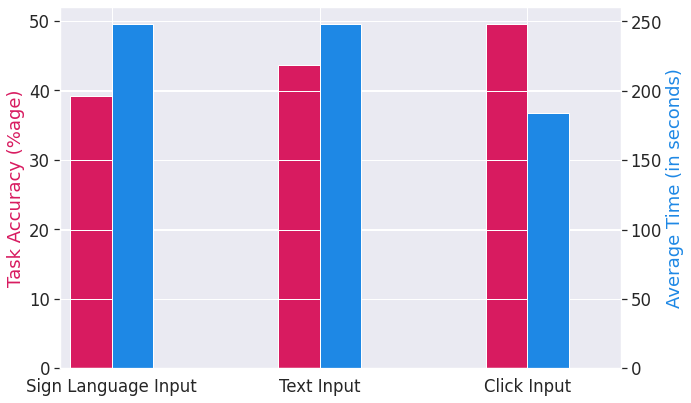

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)
sns.set(font_scale = 1.5)
plt.rcParams.update({'font.size': 20})

s = StringIO("""     "Task Accuracy"     "Average Time"
"Sign Language Input"     39.12   248
"Text Input"     43.67   248
"Click Input"    49.52  184""")

df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

df['Task Accuracy'].plot(kind='bar', color='#D81B60', ax=ax, width=width, position=1, rot=0)
df['Average Time'].plot(kind='bar', color='#1E88E5', ax=ax2, width=width, position=0, rot=0)

ax.set_ylabel('Task Accuracy (%age)', color='#D81B60')
ax2.set_ylabel('Average Time (in seconds)', color='#1E88E5')

plt.tight_layout()

plt.show()

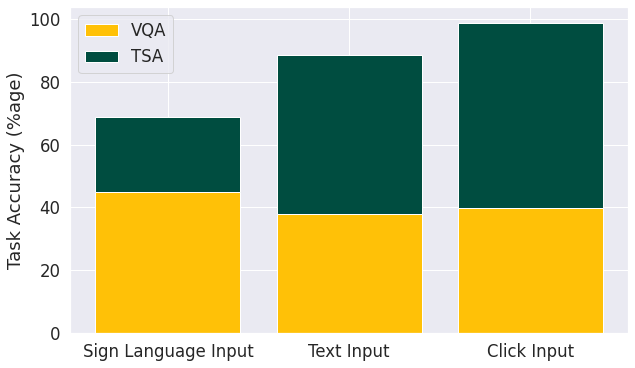

In [51]:
x = ['Sign Language Input', 'Text Input', 'Click Input']
y1 = np.array([44.94, 37.85, 39.77])
y2 = np.array([23.77, 50.72, 58.95])
  
sns.set(font_scale = 1.5)
# plot bars in stack manner
plt.bar(x, y1, color='#FFC107')
plt.bar(x, y2, bottom=y1, color='#004D40')

plt.ylabel("Task Accuracy (%age)")
plt.legend(["VQA", "TSA"])
plt.show()

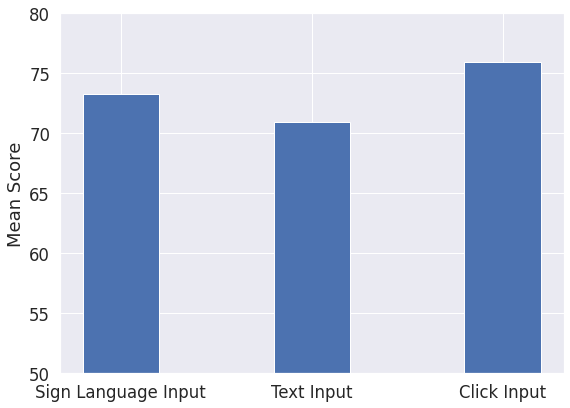

In [55]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams.update({'font.size': 18})
ax = fig.add_axes([0,0,1,1])
sns.set(font_scale = 1.5)
langs = ['Sign Language Input', 'Text Input', 'Click Input']
students = [73.279, 70.957, 75.916] #[83.279, 68.357, 71.916] # [60.27,63.51,65.46]
plt.ylabel("Mean Score")
plt.ylim(50,80)
ax.bar(langs,students, width=0.4)
plt.show()

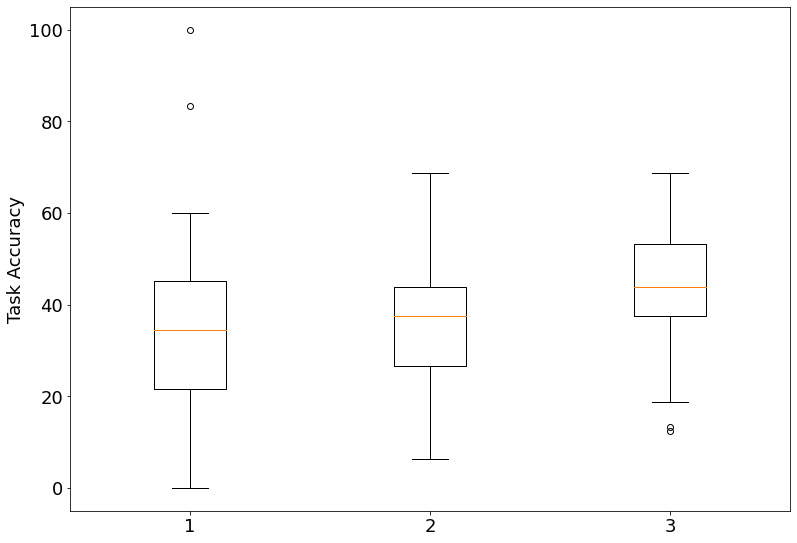

In [111]:
data = [np.asarray(sl_accuracy_collection), np.asarray(text_accuracy_collection),
        np.asarray(click_accuracy_collection)]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)
plt.ylabel("Task Accuracy") 
# show plot
plt.show()

/tmp/ipykernel_10783/1918265195.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=a.append(b).append(d)


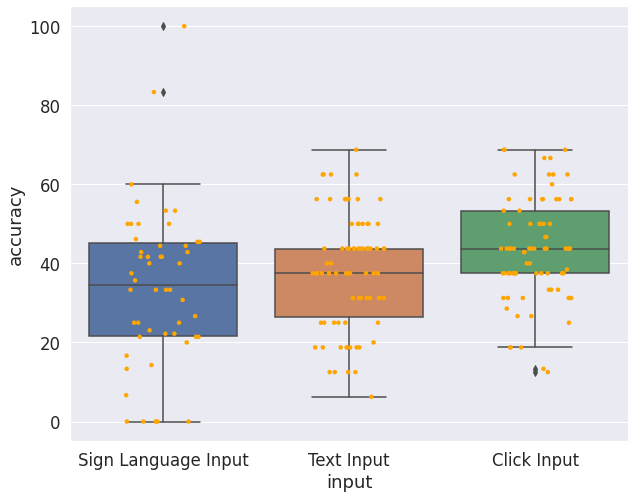

In [157]:


plt.rcParams["figure.figsize"] = (10,8)

a = pd.DataFrame({ 'input' : np.repeat('Sign Language Input',len(sl_accuracy_collection)), 'accuracy': np.asarray(sl_accuracy_collection) })
b = pd.DataFrame({ 'input' : np.repeat('Text Input',len(text_accuracy_collection)), 'accuracy': np.asarray(text_accuracy_collection) })
d = pd.DataFrame({ 'input' : np.repeat('Click Input',len(click_accuracy_collection)), 'accuracy': np.asarray(click_accuracy_collection) })

df=a.append(b).append(d)
 
# Usual boxplot
sns.set_theme()
sns.set(font_scale = 1.5)
p = sns.boxplot(x='input', y='accuracy', data=df)
ax = sns.stripplot(x='input', y='accuracy', data=df, color="orange", jitter=0.2, size=4.5)
plt.show()

/tmp/ipykernel_16547/2539944266.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=a.append(b).append(d)


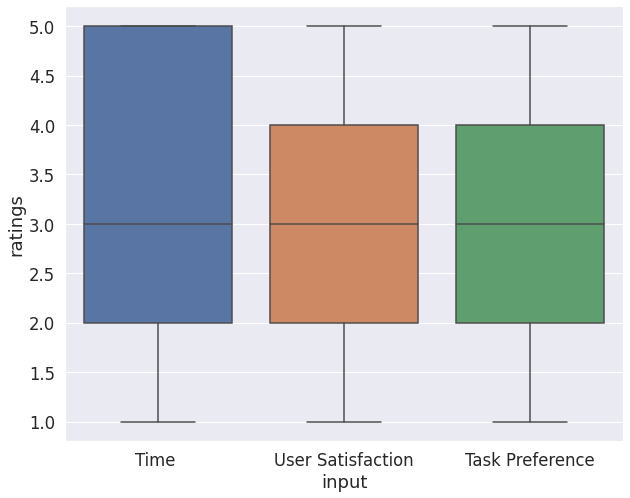

In [91]:


plt.rcParams["figure.figsize"] = (10,8)

a = pd.DataFrame({ 'input' : np.repeat('Time ',len(sl_time_rating_sum)), 'ratings': np.asarray(sl_time_rating_sum) })
b = pd.DataFrame({ 'input' : np.repeat('User Satisfaction',len(sl_interface_rating_sum)), 'ratings': np.asarray(sl_interface_rating_sum) })
d = pd.DataFrame({ 'input' : np.repeat('Task Preference',len(sl_preference_rating_sum)), 'ratings': np.asarray(sl_preference_rating_sum) })

df=a.append(b).append(d)
 
# Usual boxplot
sns.set_theme()
sns.set(font_scale = 1.5)
p = sns.boxplot(x='input', y='ratings', data=df)
#ax = sns.stripplot(x='input', y='accuracy', data=df, color="orange", jitter=0.2, size=4.5)
plt.show()

Text(0, 0.5, 'Input Types')

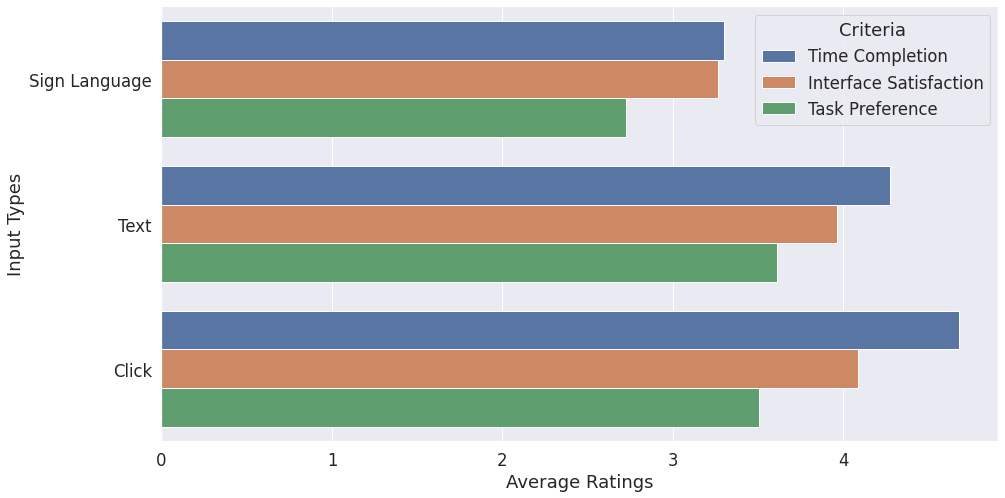

In [128]:
df = pd.DataFrame({
    'input':['Sign Language','Text','Click',
            'Sign Language','Text','Click',
            'Sign Language','Text','Click'],
    'avg_rating': [3.297, 4.271, 4.675,
                  3.263, 3.959, 4.085,
                  2.727, 3.609, 3.502],
    'Criteria':['Time Completion', 'Time Completion', 'Time Completion', 
                'Interface Satisfaction','Interface Satisfaction','Interface Satisfaction',
                'Task Preference','Task Preference','Task Preference'
               ]
})
plt.rcParams["figure.figsize"] = (15,8)
#create grouped bar chart

sns.barplot(x='avg_rating', y='input', hue='Criteria', data=df, estimator=np.mean, ci=85, capsize=.2) 
plt.xlabel("Average Ratings")
plt.ylabel("Input Types")